In [38]:
# %matplotlib notebook


In [85]:
#Import Required Dependencies

import pandas as pd
import numpy as np
import os
import scipy.stats as stats
import re
import matplotlib.pyplot as plt
import numpy as np 
from scipy.stats import linregress
from scipy import stats as st


In [86]:
# Importing updated csv file 

cleaned_df = pd.read_csv("cleaned_data_js_sc_rg.csv", encoding="ISO-8859-1")

cleaned_df.head(10)


,S. No.,Timestamp,GADE,Game,Platform,Hours,earnings,whyplay,League,streams,...,Degree,Birthplace,Residence,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,Both Singleplayer and Multiplayer,Skyrim,"Console (PS, Xbox, ...)",15,I play for fun,having fun,Unranked,0,...,Bachelor (or equivalent),USA,USA,Singleplayer,Accept,1,23,5,USA,USA
1,2,42052.00680,Somewhat difficult,Other,PC,8,I play for fun,having fun,Unranked,2,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,8,16,33,USA,USA
2,3,42052.03860,Both Singleplayer and Multiplayer,Other,PC,0,I play for fun,having fun,Unranked,0,...,Bachelor (or equivalent),Germany,Germany,Singleplayer,Accept,8,17,31,DEU,DEU
3,4,42052.06804,Both Singleplayer and Multiplayer,Other,PC,20,I play for fun,improving,Unranked,5,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,0,17,11,USA,USA
4,5,42052.08948,Very difficult,Other,"Console (PS, Xbox, ...)",20,I play for fun,having fun,Unranked,1,...,High school diploma (or equivalent),USA,South Korea,Multiplayer,Accept,14,14,13,KOR,USA
5,6,42052.13119,Both Singleplayer and Multiplayer,Other,"Console (PS, Xbox, ...)",4,I play for fun,relaxing,Unranked,0,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,1,17,13,USA,USA
6,7,42052.14622,Both Singleplayer and Multiplayer,Other,PC,30,I play for fun,relaxing,Unranked,8,...,High school diploma (or equivalent),USA,USA,Multiplayer,Accept,0,16,26,USA,USA
7,9,42052.19737,Very difficult,Other,"Console (PS, Xbox, ...)",2,I play for fun,winning,Unranked,0,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,12,12,55,USA,USA
8,10,42052.22995,Somewhat difficult,World of Warcraft,PC,25,I play for fun,improving,Unranked,0,...,High school diploma (or equivalent),Finland,Finland,Multiplayer,Accept,10,13,26,FIN,FIN
9,11,42052.24204,Somewhat difficult,Other,PC,14,I play for fun,having fun,Unranked,0,...,High school diploma (or equivalent),USA,USA,Singleplayer,Accept,19,27,6,USA,USA


In [87]:
# Cleaning inputs which are more than 168 to get accurate data (Column = Hours)

cleaned_hours = cleaned_df[cleaned_df["Hours"]<168]

cleaned_hours.head()

cleaned_hours["Hours"].max()

160

In [ ]:
# Cleaning inputs which are rewritten as Both Single player and Multiplayer (Column = whyplay)

cleaned_hours = cleaned_hours[cleaned_hours["whyplay"]!="Both Singleplayer and Multiplayer"]

cleaned_hours.head()

In [122]:
# Cleaning inputs which are rewritten as Both Single player and Multiplayer (Column = Degree)

cleaned_hours = cleaned_hours[cleaned_hours["Degree"]!="Both Singleplayer and Multiplayer"]

cleaned_hours.head()

,S. No.,Timestamp,GADE,Game,Platform,Hours,earnings,whyplay,League,streams,...,Degree,Birthplace,Residence,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,Both Singleplayer and Multiplayer,Skyrim,"Console (PS, Xbox, ...)",15,I play for fun,having fun,Unranked,0,...,Bachelor (or equivalent),USA,USA,Singleplayer,Accept,1,23,5,USA,USA
1,2,42052.00680,Somewhat difficult,Other,PC,8,I play for fun,having fun,Unranked,2,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,8,16,33,USA,USA
2,3,42052.03860,Both Singleplayer and Multiplayer,Other,PC,0,I play for fun,having fun,Unranked,0,...,Bachelor (or equivalent),Germany,Germany,Singleplayer,Accept,8,17,31,DEU,DEU
3,4,42052.06804,Both Singleplayer and Multiplayer,Other,PC,20,I play for fun,improving,Unranked,5,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,0,17,11,USA,USA
4,5,42052.08948,Very difficult,Other,"Console (PS, Xbox, ...)",20,I play for fun,having fun,Unranked,1,...,High school diploma (or equivalent),USA,South Korea,Multiplayer,Accept,14,14,13,KOR,USA


In [123]:
# Cleaning inputs which are rewritten as Both Single player and Multiplayer (Column = Platform)

cleaned_hours = cleaned_hours[cleaned_hours["Platform"]!="Both Singleplayer and Multiplayer"]

cleaned_hours.head()

,S. No.,Timestamp,GADE,Game,Platform,Hours,earnings,whyplay,League,streams,...,Degree,Birthplace,Residence,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,Both Singleplayer and Multiplayer,Skyrim,"Console (PS, Xbox, ...)",15,I play for fun,having fun,Unranked,0,...,Bachelor (or equivalent),USA,USA,Singleplayer,Accept,1,23,5,USA,USA
1,2,42052.00680,Somewhat difficult,Other,PC,8,I play for fun,having fun,Unranked,2,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,8,16,33,USA,USA
2,3,42052.03860,Both Singleplayer and Multiplayer,Other,PC,0,I play for fun,having fun,Unranked,0,...,Bachelor (or equivalent),Germany,Germany,Singleplayer,Accept,8,17,31,DEU,DEU
3,4,42052.06804,Both Singleplayer and Multiplayer,Other,PC,20,I play for fun,improving,Unranked,5,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,0,17,11,USA,USA
4,5,42052.08948,Very difficult,Other,"Console (PS, Xbox, ...)",20,I play for fun,having fun,Unranked,1,...,High school diploma (or equivalent),USA,South Korea,Multiplayer,Accept,14,14,13,KOR,USA


In [124]:
# Finding a counts of total gender distribution in the survey

cleaned_df["Gender"].value_counts()

Gender_Count_Input = cleaned_hours["Gender"].value_counts()

Gender_Count = pd.DataFrame(cleaned_hours["Gender"].value_counts())

Gender_Count = Gender_Count.rename(columns={"Gender" : "Gender", "Gender": "Count"})

Gender_Count
# labels_graph = Gender_Count["Count"]

# print(labels_graph)

,Count
Male,9564
Female,598
Other,38


In [125]:
# Creating values to plot a Pie chart for gender distribution

# labels = [cleaned_df["Gender"].unique()]

labels = ["Male", "Female", "Other"]

# sizes = [cleaned_df["Gender"].value_counts()]

# sizes = [Gender_Count["Count"]]

sizes = [10984, 653, 45]

colors = ["red", "yellow", "blue"]

explode = (0.2, 0.1, 0)

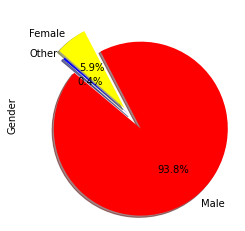

In [126]:
# Creating values to plot a Pie chart for gender distribution

Gender_Count_Chart = Gender_Count_Input.plot.pie(autopct="%1.1f%%", startangle=140, explode = explode, shadow = True, colors = colors)

colors = ["red", "yellow", "blue"]
# plt.title("Gender Count")


In [127]:
# Creating data for avg hours of gaming per each gender drop down

# Hours_df = cleaned_df.groupby(["Hours"])
# Hours_df.head(10)

# Outlier = 8000

# New_df = cleaned_df[cleaned_df["Hours"].isin(Outlier) == False]
# New_df

Avg = cleaned_hours["Hours"].groupby(cleaned_hours["Gender"]).mean()
Avg_gender_input = pd.DataFrame(Avg)
Avg_gender_input


,Hours
Gender,
Female,19.135452
Male,21.415935
Other,30.842105


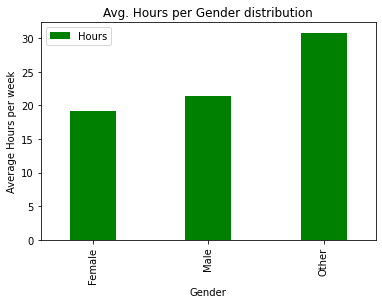

In [128]:
# Gender Distribution graph comparision. (Other seems to have a higher average in this analysis however only 50 inputs are collected while)\n 
# .. while inputs for male and female are 11,000 and 650 approx. 

Gender_distribution_chart = Avg_gender_input.plot.bar(color = 'g', title = "Avg. Hours per Gender distribution", xlabel = "Gender", ylabel = "Average Hours per week", width = 0.4)

# Gender_distribution_chart, ax = plt.subplots()

# indexes = ["Female", "Male", "Other"]

# values = [18.95, 21.64, 30.44]
# values = Avg_gender_input["Hours"]
# bars = ax.barh(indexes, values)

# ax.bar_label(bars)


# for bars in ax.containers:
#    ax.bar_label(bars)
    


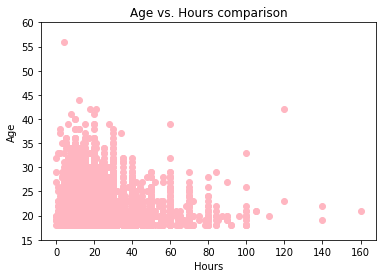

In [129]:
# Age vs. Hours Comparsion on a scatter plot. 

x_axis = cleaned_hours['Hours']
y_axis = cleaned_hours['Age']

plt.scatter(x_axis, y_axis, marker = 'o', color = 'lightpink')
plt.ylim(15,60)
plt.xlabel("Hours")
plt.ylabel("Age")
plt.title("Age vs. Hours comparison")
plt.show()



<AxesSubplot:title={'center':'Occupation vs. No. of Hours Comparison'}, xlabel='Occupation', ylabel='Hours per Week'>

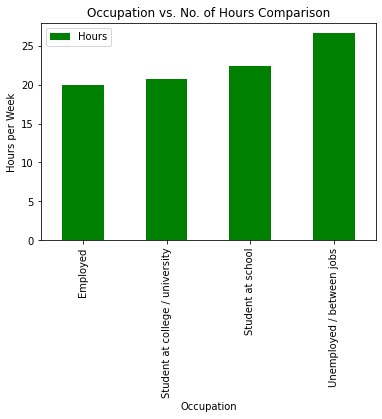

In [140]:
# Work vs Hours Comparsion on a bar plot. 

WvH = cleaned_hours["Hours"].groupby(cleaned_hours["Work"]).mean()

WvH_input = pd.DataFrame(WvH)

WvH_input.plot.bar(color = 'g',width = 0.5, title = "Occupation vs. No. of Hours Comparison", xlabel = "Occupation", ylabel = "Hours per Week")

In [131]:
# zz = cleaned_hours['Hours'].plot.scatter()

<AxesSubplot:title={'center':'Reason to Play vs. No. of Hours Comparison'}, xlabel='Reason for Gaming', ylabel='Hours per Week'>

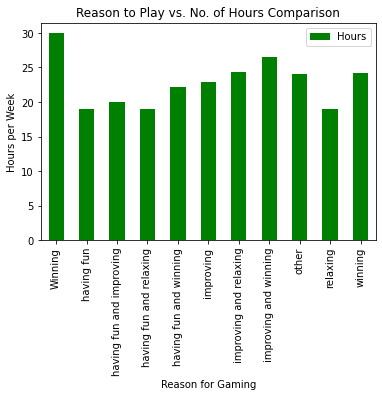

In [132]:
# Whyplay vs Hours Comparsion on a bar plot. 

# cleaned_hours[""]

WhyPlayVsHours = cleaned_hours["Hours"].groupby(cleaned_hours["whyplay"]).mean()

WhyPlayVsHours_input = pd.DataFrame(WhyPlayVsHours)

WhyPlayVsHours_input.plot.bar(color = 'g',width = 0.5, title = "Reason to Play vs. No. of Hours Comparison", xlabel = "Reason for Gaming", ylabel = "Hours per Week")

<AxesSubplot:title={'center':'Playstyle vs. No. of Hours Comparison'}, xlabel='Playstyle', ylabel='Hours per Week'>

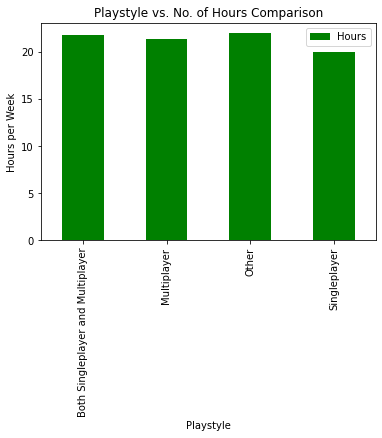

In [133]:
# Playstyle vs Hours Comparsion on a bar plot. 

PvH = cleaned_hours["Hours"].groupby(cleaned_hours["Playstyle"]).mean()

PvH_input = pd.DataFrame(PvH)

PvH_input.plot.bar(color = 'g',width = 0.5, title = "Playstyle vs. No. of Hours Comparison", xlabel = "Playstyle", ylabel = "Hours per Week")

<AxesSubplot:title={'center':"Gamer's League vs. No. of Hours Comparison"}, xlabel='Playstyle', ylabel='Hours per Week'>

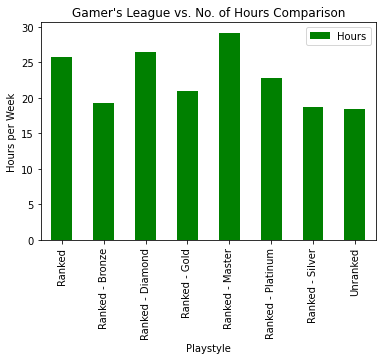

In [134]:
# League vs Hours Comparsion on a bar plot. 

LvH = cleaned_hours["Hours"].groupby(cleaned_hours["League"]).mean()

LvH_input = pd.DataFrame(LvH)

LvH_input.plot.bar(color = 'g',width = 0.5, title = "Gamer's League vs. No. of Hours Comparison", xlabel = "Playstyle", ylabel = "Hours per Week")


<AxesSubplot:title={'center':"Gamer's Platform vs. No. of Hours Comparison"}, xlabel='Platform', ylabel='Hours per Week'>

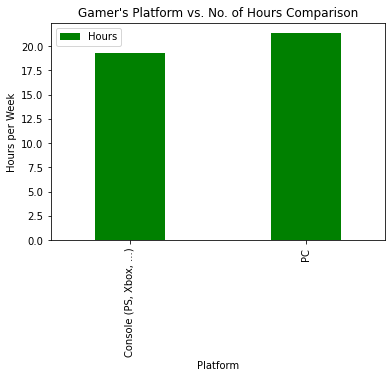

In [135]:
# Platform vs Hours Comparsion on a bar plot

PlatformVsHours = cleaned_hours["Hours"].groupby(cleaned_hours["Platform"]).mean()

PlatformVsHours_input = pd.DataFrame(PlatformVsHours)

PlatformVsHours_input.plot.bar(color = 'g',width = 0.4, title = "Gamer's Platform vs. No. of Hours Comparison", xlabel = "Platform", ylabel = "Hours per Week")


<AxesSubplot:title={'center':"Gamer's Education vs. No. of Hours Comparison"}, xlabel='Education', ylabel='Hours per Week'>

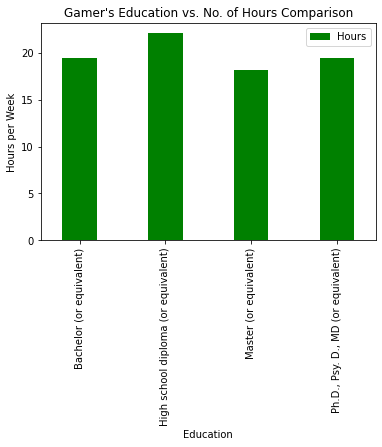

In [137]:
# Degree vs Hours Comparsion on a bar plot

DvH = cleaned_hours["Hours"].groupby(cleaned_hours["Degree"]).mean()

DvH_input = pd.DataFrame(DvH)

DvH_input.plot.bar(color = 'g',width = 0.4, title = "Gamer's Education vs. No. of Hours Comparison", xlabel = "Education", ylabel = "Hours per Week")






In [151]:
# Gender vs League representation -- creating new dataframes for each gender type

female_df = cleaned_hours.loc[cleaned_hours['Gender']=='Female']
male_df = cleaned_hours.loc[cleaned_hours["Gender"] == "Male"]
other_df = cleaned_hours.loc[cleaned_hours["Gender"] == "Other"]



Unranked             251
Ranked - Silver      119
Ranked - Gold        107
Ranked - Platinum     44
Ranked - Bronze       32
Ranked - Diamond      23
Ranked                18
Ranked - Master        4
Name: League, dtype: int64

<AxesSubplot:title={'center':"Women's League participation vs No. of Hours Comparison"}, xlabel="Women's League participation", ylabel='Hours per Week'>

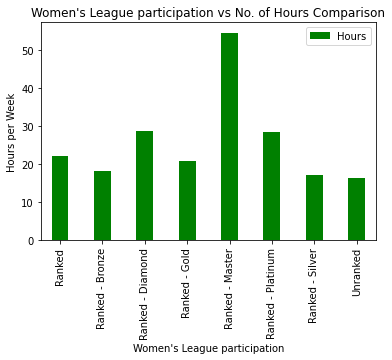

In [156]:
# Female League participation vs No. of Hours representation 

FLvH = female_df["Hours"].groupby(female_df["League"]).mean()

FLvH_input = pd.DataFrame(FLvH)

FLvH_input.plot.bar(color = 'g', width = 0.4, title = "Women's League participation vs No. of Hours Comparison", xlabel = "Women's League participation", ylabel = "Hours per Week")



Ranked - Gold        2285
Ranked - Platinum    1935
Unranked             1726
Ranked - Silver      1602
Ranked - Diamond     1241
Ranked - Bronze       366
Ranked                257
Ranked - Master       152
Name: League, dtype: int64

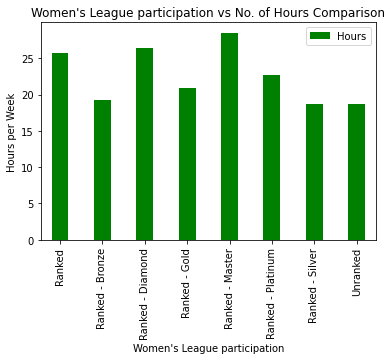

In [153]:
# Male League participation vs No. of Hours representation 

MLvH = male_df["Hours"].groupby(male_df["League"]).mean()

MLvH_input = pd.DataFrame(MLvH)

MLvH_input.plot.bar(color = 'g', width = 0.4, title = "Women's League participation vs No. of Hours Comparison", xlabel = "Women's League participation", ylabel = "Hours per Week")

male_df["League"].value_counts()

<AxesSubplot:title={'center':"Women's League participation Comparison"}, xlabel='League', ylabel="Women's League participation">

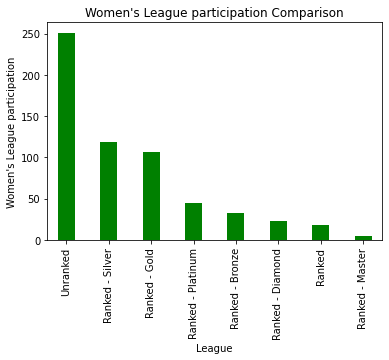

In [159]:
female_df["League"].value_counts().plot.bar(color='g', width = 0.4, title = "Women's League participation Comparison", xlabel = "League", ylabel = "Women's League participation")


<AxesSubplot:title={'center':"Men's League participation Comparison"}, xlabel='League', ylabel="Men's League participation">

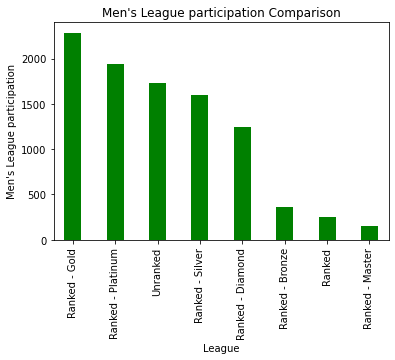

In [160]:
male_df["League"].value_counts().plot.bar(color='g', width = 0.4, title = "Men's League participation Comparison", xlabel = "League", ylabel = "Men's League participation")
